DL_Assignment_1

MA23M001 Abani Singha

Question-1

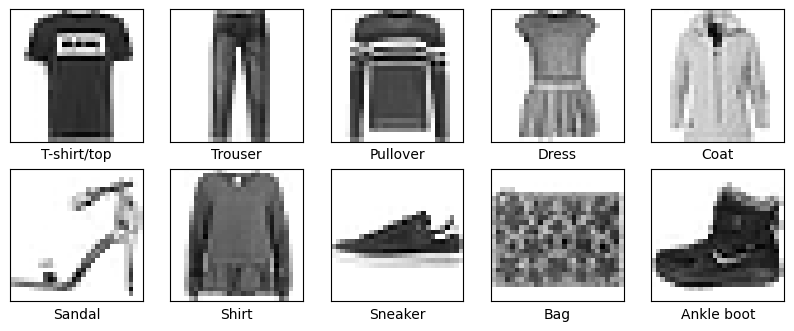

Training images shape: (48000, 784)
Training labels shape: (48000, 10)
Validation images shape: (12000, 784)
Validation labels shape: (12000, 10)
Testing images shape: (10000, 784)
Testing labels shape: (10000, 10)


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Define class labels
class_labels = {0: "T-shirt/top",1: "Trouser",2: "Pullover",3: "Dress",4: "Coat",5: "Sandal",6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle boot"}

plt.figure(figsize=(10, 10))
for label in range(10):
    k = next(i for i, j in enumerate(y_train) if j == label)
    plt.subplot(5, 5, label + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[k], cmap=plt.cm.binary)
    plt.xlabel(class_labels[label])

plt.show()

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Flatten the image data
X_train = X_train.reshape(X_train.shape[0], -1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize the image data
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

def one_hot_encod(arr):
  mat = np.zeros((len(arr),10))
  for i in range(len(arr)):
    mat[i,arr[i]] = 1
  return mat
# Convert labels to one-hot encoding
Y_train =  one_hot_encod(y_train)
Y_valid =  one_hot_encod(y_valid)
Y_test =  one_hot_encod(y_test)
print("Training images shape:", X_train.shape)
print("Training labels shape:", Y_train.shape)
print("Validation images shape:", X_valid.shape)
print("Validation labels shape:", Y_valid.shape)
print("Testing images shape:", X_test.shape)
print("Testing labels shape:", Y_test.shape)


Quetion-2

Feed forword neural Network for full batch Data

In [6]:
import numpy as np
def init_N_network( num_hidden_layer, num_nodes_hidden_layers, weight, input_size, output_size ):
    network_size = []
    for i in range(num_hidden_layer):
      network_size.append(num_nodes_hidden_layers[i])
    size = [input_size] + network_size + [output_size]
    theta0 = {}
    if weight == 'random':
      for i in range(1, num_hidden_layer+2):
        theta0['W' + str(i)] = np.random.randn(size[i], size[i-1])
        theta0['b' + str(i)] = np.random.randn(size[i], 1)
    if weight == 'xavier':
      for i in range(1, num_hidden_layer+2):
          theta0["W" + str(i)] = np.random.randn(size[i], size[i-1])*(np.sqrt(2/(size[i-1])))
          theta0["b" + str(i)] = np.random.randn(size[i], 1)*(np.sqrt(2/(size[i-1])))

    return theta0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def der_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

def softmax(x):
  x = x - np.max(x)
  return np.exp(x)/np.sum(np.exp(x),axis=0)


def forword_prop(x,theta, num_hidden_layer,input_size):
  a = {}
  a['a'+str(0)] = np.zeros((input_size,1))
  h = {'h0':x}
  for i in range(1,num_hidden_layer+1):
    a["a"+str(i)] = np.dot(theta['W'+str(i)],h['h'+str(i-1)]) + theta['b'+str(i)]
    h['h'+str(i)] = sigmoid(a["a"+str(i)])
  a['a'+str(num_hidden_layer+1)] = np.dot(theta['W'+str(num_hidden_layer+1)],h['h'+str(num_hidden_layer)]) + theta['b'+str(num_hidden_layer+1)]
  y_pred = softmax(a['a'+str(num_hidden_layer+1)])

  return a,h,y_pred

'''
def backprop(x, y_actual, num_hidden_layer, theta,input_size):
  a,h,y_pred = forword_prop(x,theta, num_hidden_layer,input_size)
  grad_W_b = {}
  grad_h_a = {}
  grad_h_a['a'+str(num_hidden_layer+1)] = -1*(y_actual.T - y_pred)
  for i in range(num_hidden_layer+1, 0, -1):
    grad_W_b['W'+str(i)] = np.dot(grad_h_a['a'+str(i)],h['h'+str(i-1)].T)
    grad_W_b['b'+str(i)] = np.mean(grad_h_a['a'+str(i)],axis = 0, keepdims=True)
    grad_h_a['h'+str(i-1)] = np.dot(theta['W'+str(i)].T,grad_h_a['a'+str(i)] )
    grad_h_a['a'+str(i-1)] = grad_h_a['h'+str(i-1)]*(der_sigmoid(a['a'+str(i-1)]))

  return grad_W_b

'''
def backprop(x, y_actual, num_hidden_layer, theta, input_size):
    m = x.shape[0]
    a, h, y_pred = forword_prop(x, theta, num_hidden_layer, input_size)
    grad_W_b = {}
    grad_h_a = {}
    grad_h_a['a' + str(num_hidden_layer + 1)] = -1 * (y_actual.T - y_pred)
    for i in range(num_hidden_layer + 1, 0, -1):
        grad_W_b['W' + str(i)] = (1/m)*np.dot(grad_h_a['a' + str(i)], h['h' + str(i - 1)].T)
        grad_W_b['b' + str(i)] = (1/m)*np.mean(grad_h_a['a' + str(i)], axis=1, keepdims=True)  # Adjusted dimension
        grad_h_a['h' + str(i - 1)] = np.dot(theta['W' + str(i)].T, grad_h_a['a' + str(i)])
        grad_h_a['a' + str(i - 1)] = grad_h_a['h' + str(i - 1)] * (der_sigmoid(a['a' + str(i - 1)]))

    return grad_W_b


def gradient_decent(lr, theta, x, y_actual, num_hidden_layer,input_size):
  for epoch in range(100):
    grad = backprop(x, y_actual, num_hidden_layer, theta,input_size)
    for i in range(1, num_hidden_layer+2):
      theta['W' + str(i)] -= lr*grad['W' + str(i)]
      theta['b' + str(i)] -= lr*grad['b' +str(i)]
  return theta


def cal_accuracy(X_test,y_test,theta_new, num_hidden_layer,input_size):
  a,h,y_test_pred = forword_prop(X_test,theta_new, num_hidden_layer,input_size)

  assert y_test.shape == y_test_pred.shape
  y_test = np.argmax(y_test, axis = 0)
  y_test_pred = np.argmax(y_test_pred, axis = 0)
  correct_predictions = 0
  for i in range(y_test.shape[0]):
    if y_test[i] == y_test_pred[i]:
      correct_predictions += 1
  accuracy = correct_predictions /y_test.shape[0]

  return accuracy


Vanilla Gradient Decent optimizer

In [7]:
import matplotlib.pyplot as plt

def gradient_decent(lr, theta, x, y_actual, num_hidden_layer, input_size):
    losses = []  # List to store the loss for each epoch
    for epoch in range(100):
        grad = backprop(x, y_actual, num_hidden_layer, theta, input_size)
        for i in range(1, num_hidden_layer + 2):
            theta['W' + str(i)] -= lr * grad['W' + str(i)]
            theta['b' + str(i)] -= lr * grad['b' + str(i)]

        # Compute and store the loss for this epoch
        a, _, y_pred = forword_prop(x, theta, num_hidden_layer, input_size)
        loss = -np.mean(np.sum(y_actual.T * np.log(y_pred), axis=0))
        losses.append(loss)

        print(f"Epoch {epoch+1}, Loss: {loss}")

    # Plot the loss function over epochs
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return theta , losses




Question 3

Feed forword neural network for mini batches and with different optimizers

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def init_network( num_hidden_layer, num_nodes_hidden_layers, weight, input_size, output_size ):
    network_size = []
    for i in range(num_hidden_layer):
      network_size.append(num_nodes_hidden_layers)
    size = [input_size] + network_size + [output_size]
    theta0 = {}
    if weight == 'random':
      for i in range(1, num_hidden_layer+2):
        theta0['W' + str(i)] = np.random.randn(size[i], size[i-1])
        theta0['b' + str(i)] = np.random.randn(size[i], 1)
    if weight == 'xavier':
      for i in range(1, num_hidden_layer+2):
          theta0["W" + str(i)] = np.random.randn(size[i], size[i-1])*(np.sqrt(2/(size[i-1])))
          theta0["b" + str(i)] = np.random.randn(size[i], 1)*(np.sqrt(2/(size[i-1])))

    return theta0

def sigmoid(x):
  return 1 /(1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

def tanh(x):
	return np.tanh(x)

def deriv_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

def deriv_relu(x):
  return np.where(x <= 0, 0, 1)

def deriv_tanh(x):
  return (1 - (tanh(x))**2)

def softmax(x):
  x = x - np.max(x)
  return np.exp(x)/np.sum(np.exp(x),axis=0)

def activation(x, activ_fun):
  if activ_fun == 'sigmoid':
    return sigmoid(x)
  elif activ_fun == 'relu':
    return relu(x)
  else:
    return tanh(x)

def grad_activation(x, activ_fun):
  if activ_fun == 'sigmoid':
    return deriv_sigmoid(x)
  elif activ_fun == 'relu':
    return deriv_relu(x)
  else:
    return deriv_tanh(x)

def cross_entropy(y_actual, y_pred):
    epsilon = 1e-15  # to prevent log(0) which is undefined
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(np.sum(y_actual * np.log(y_pred), axis=0))
    return loss


def forword_prop(x,theta,activ_fun, num_hidden_layer,input_size):
  a = {}
  a['a'+str(0)] = np.zeros((input_size,1))
  h = {'h0':x}
  for i in range(1,num_hidden_layer+1):
    a["a"+str(i)] = np.dot(theta['W'+str(i)],h['h'+str(i-1)]) + theta['b'+str(i)]
    h['h'+str(i)] = activation(a["a"+str(i)], activ_fun)
  a['a'+str(num_hidden_layer+1)] = np.dot(theta['W'+str(num_hidden_layer+1)],h['h'+str(num_hidden_layer)]) + theta['b'+str(num_hidden_layer+1)]
  y_pred = softmax(a['a'+str(num_hidden_layer+1)])

  return a,h,y_pred

def back_prop(x, y_actual, activ_fun, num_hidden_layer, theta,input_size):
  a,h,y_pred = forword_prop(x,theta,activ_fun, num_hidden_layer,input_size)
  grad_W_b = {}
  grad_h_a = {}
  grad_h_a['a'+str(num_hidden_layer+1)] = -1*(y_actual - y_pred)
  for i in range(num_hidden_layer+1, 0, -1):
    grad_W_b['W'+str(i)] = np.dot(grad_h_a['a'+str(i)],h['h'+str(i-1)].T)
    grad_W_b['b'+str(i)] = grad_h_a['a'+str(i)]  #np.mean(grad_h_a['a'+str(i)]#,axis = 0, keepdims=True)
    grad_h_a['h'+str(i-1)] = np.dot(theta['W'+str(i)].T,grad_h_a['a'+str(i)] )
    grad_h_a['a'+str(i-1)] = grad_h_a['h'+str(i-1)]*(grad_activation(a['a'+str(i-1)], activ_fun))

  return grad_W_b
 # Stochastic Gradient Decent
def sgd(lr, x_train, y_train, X_valid, Y_valid, epochs, activ_fun, num_hidden_layer,num_nodes_hidden_layers, weight,batch_size, input_size, output_size):
  theta = init_network( num_hidden_layer, num_nodes_hidden_layers, weight, input_size, output_size )
  losses = []  # List to store the loss for each epoch
  length = x_train.shape[0]

  for epoch in range(epochs):
      arr = np.arange(length)
      np.random.shuffle(arr)
      no_of_pts = 0
      grad_new = {key: np.zeros_like(value) for key, value in theta.items()}
      for j in range(length):
          no_of_pts += 1
          x = x_train[arr[j],:].reshape(-1, 1)
          y_actual = y_train[arr[j],:].reshape(-1, 1)
          grad = back_prop(x, y_actual, activ_fun, num_hidden_layer, theta,input_size)
          for k in range(1, num_hidden_layer + 2):
            grad_new['W' + str(k)] += grad['W' + str(k)]
            grad_new['b' + str(k)] += grad['b' + str(k)]
          if no_of_pts % batch_size == 0:
            for i in range(1, num_hidden_layer + 2):
                theta['W' + str(i)] -= lr * grad_new['W' + str(i)]
                theta['b' + str(i)] -= lr * grad_new['b' + str(i)]

      # Compute and store the loss and accuracy for this epoch
      acc = calculate_accuracy(x_train,y_train,theta,activ_fun, num_hidden_layer,input_size)
      a, _, y_pred = forword_prop(x_train.T,theta,activ_fun, num_hidden_layer,input_size)
      loss = cross_entropy(y_train.T, y_pred)
      losses.append(loss)
      validation_accuracy = calculate_accuracy(X_valid,Y_valid,theta,activ_fun, num_hidden_layer,input_size)


      print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
      wandb.log({'train_loss': loss})
      wandb.log({'train_accuracy': acc*100})
      wandb.log({'Val_accuracy': validation_accuracy * 100})
      wandb.log({'epoch': epoch})


  # Plot the loss function over epochs
  plt.plot(losses)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Loss over Epochs')
  plt.show()

  return theta

def calculate_accuracy(X_test,y_test,theta_new,activ_fun, num_hidden_layer,input_size):
  len = X_test.shape[0]
  correct_predictions = 0
  for i in range(len):
    X_tes = X_test[i,:].reshape(-1, 1)
    a,h,y_test_pred = forword_prop(X_tes,theta_new, activ_fun, num_hidden_layer,input_size)

    y1 = np.argmax(y_test[i,:].reshape(-1, 1), axis = 0)
    y2 = np.argmax(y_test_pred, axis = 0)

    if y1 == y2:
      correct_predictions += 1
  accuracy = correct_predictions /y_test.shape[0]

  return accuracy



Momentum based gradient decent

In [9]:
def momentum(lr, theta, x_train, y_train, X_valid, Y_valid, activ_fun, epochs, num_hidden_layer, input_size, batch_size, beta=0.9):
    losses = []  # List to store the loss for each epoch
    length = x_train.shape[0]
    v = {key: np.zeros_like(value) for key, value in theta.items()}  # Initialize velocities
    prev_v = {key: np.zeros_like(value) for key, value in theta.items()}
    for epoch in range(epochs):  # Adjust the number of epochs as needed
        no_of_pts = 0
        loss = 0
        itr = 0
        no_of_batch = 0
        grad_new = {key: np.zeros_like(value) for key, value in theta.items()}
        for j in range(length):
            no_of_pts += 1
            x = x_train[j, :].reshape(-1, 1)
            y_actual = y_train[j, :].reshape(-1, 1)
            grad = back_prop(x, y_actual,activ_fun, num_hidden_layer, theta, input_size)
            for i in range(num_hidden_layer+1, 0, -1):
                grad_new['W'+str(i)] += grad['W'+str(i)]
                grad_new['b'+str(i)] += grad['b'+str(i)]

            if no_of_pts % batch_size == 0:
              no_of_batch += 1
              for i in range(1, num_hidden_layer + 2):
                  # Update velocity
                  v['W' + str(i)] = beta * prev_v['W' + str(i)] + lr * grad_new['W'+str(i)]
                  v['b' + str(i)] = beta * prev_v['b' + str(i)] + lr * grad_new['b'+str(i)]

              for i in range(1, num_hidden_layer + 2):
                  # Update parameters
                  theta['W' + str(i)] -= v['W' + str(i)]
                  theta['b' + str(i)] -= v['b' + str(i)]

              for i in range(1, num_hidden_layer + 2):
                  prev_v['W' + str(i)] = v['W' + str(i)]
                  prev_v['b' + str(i)] = v['b' + str(i)]

        # Compute and store the loss for this epoch
                  # x_batch = X_train[itr:itr+batch_size].T
                  # y_batch = Y_train[itr:itr+batch_size].T
                  # itr += batch_size
                  # a, _, y_pred = forword_prop(x_batch, theta,activ_fun, num_hidden_layer, input_size)
                  # loss += cross_entropy(y_batch, y_pred)#-np.mean(np.sum(y_batch.T * np.log(y_pred),axis = 0))
        acc = calculate_accuracy(x_train,y_train,theta,activ_fun, num_hidden_layer,input_size)
        a, _, y_pred = forword_prop(x_train.T,theta,activ_fun, num_hidden_layer,input_size)
        loss = cross_entropy(y_train.T, y_pred)
        losses.append(loss)
        validation_accuracy = calculate_accuracy(X_valid,Y_valid,theta,activ_fun, num_hidden_layer,input_size)


        print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': acc*100})
        wandb.log({'Val_accuracy': validation_accuracy * 100})
        wandb.log({'epoch': epoch})
    # Plot the loss function over epochs
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return theta



Nestrov

In [10]:
def nag(lr, theta, x_train, y_train, X_valid, Y_valid, activ_fun, epochs, num_hidden_layer, input_size, batch_size, beta=0.9):
    losses = []
    length = x_train.shape[0]
    v = {key: np.zeros_like(value) for key, value in theta.items()}
    prev_v = {key: np.zeros_like(value) for key, value in theta.items()}
    for epoch in range(epochs):
        grad_new = {key: np.zeros_like(value) for key, value in theta.items()}
        no_of_pts = 0
        no_of_batch = 0
        loss = 0
        itr = 0
        for j in range(length):
            no_of_pts += 1
            x = x_train[j, :].reshape(-1, 1)
            y_actual = y_train[j, :].reshape(-1, 1)

            for i in range(1, num_hidden_layer + 2):
              theta['W' + str(i)] -= beta * prev_v['W' + str(i)]
              theta['b' + str(i)] -= beta * prev_v['b' + str(i)]

            grad = back_prop(x, y_actual,activ_fun, num_hidden_layer, theta, input_size)
            for i in range(num_hidden_layer+1, 0, -1):
                grad_new['W'+str(i)] += grad['W'+str(i)]
                grad_new['b'+str(i)] += grad['b'+str(i)]

            if no_of_pts % batch_size == 0:
              no_of_batch += 1
              for i in range(1, num_hidden_layer + 2):
                  # Update velocity
                  v['W' + str(i)] = beta * prev_v['W' + str(i)] + lr * grad_new['W'+str(i)]
                  v['b' + str(i)] = beta * prev_v['b' + str(i)] + lr * grad_new['b'+str(i)]

              for i in range(1, num_hidden_layer + 2):
                  # Update parameters
                  theta['W' + str(i)] -= v['W' + str(i)]
                  theta['b' + str(i)] -= v['b' + str(i)]

              for i in range(1, num_hidden_layer + 2):
                  prev_v['W' + str(i)] = v['W' + str(i)]
                  prev_v['b' + str(i)] = v['b' + str(i)]

                  # x_batch = X_train[itr:itr+batch_size].T
                  # y_batch = Y_train[itr:itr+batch_size]
                  # itr += batch_size
                  # a, _, y_pred = forword_prop(x_batch, theta,activ_fun, num_hidden_layer, input_size)
                  # epsilon = 1e-15  # to prevent log(0) which is undefined
                  # y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
                  # loss += -np.mean(np.sum(y_batch.T * np.log(y_pred),axis = 0))
        acc = calculate_accuracy(x_train,y_train,theta,activ_fun, num_hidden_layer,input_size)
        a, _, y_pred = forword_prop(x_train.T,theta,activ_fun, num_hidden_layer,input_size)
        loss = cross_entropy(y_train.T, y_pred)
        losses.append(loss)
        validation_accuracy = calculate_accuracy(X_valid,Y_valid,theta,activ_fun, num_hidden_layer,input_size)


        print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': acc*100})
        wandb.log({'Val_accuracy': validation_accuracy * 100})
        wandb.log({'epoch': epoch})

    # Plot the loss function over epochs
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return theta


RMsprop

In [11]:
def RMSprop(lr, theta, x_train, y_train,X_valid, Y_valid,activ_fun, epochs, num_hidden_layer, input_size,batch_size, eps=0.01, beta=0.9):
    losses = []
    length = x_train.shape[0]
    v = {key: np.zeros_like(value) for key, value in theta.items()}
    prev_v = {key: np.zeros_like(value) for key, value in theta.items()}
    for epoch in range(epochs):
        no_of_pts = 0
        no_of_batch = 0
        loss = 0
        itr = 0
        grad_new = {key: np.zeros_like(value) for key, value in theta.items()}
        for j in range(length):
            no_of_pts += 1
            x = x_train[j, :].reshape(-1, 1)
            y_actual = y_train[j, :].reshape(-1, 1)
            grad = back_prop(x, y_actual,activ_fun, num_hidden_layer, theta, input_size)
            for i in range(num_hidden_layer+1, 0, -1):
                grad_new['W'+str(i)] += grad['W'+str(i)]
                grad_new['b'+str(i)] += grad['b'+str(i)]

            if no_of_pts % batch_size == 0:
              no_of_batch += 1
              for i in range(1, num_hidden_layer + 2):
                  # Update velocity
                  v['W' + str(i)] = beta * prev_v['W' + str(i)] + (1-beta)* ((grad_new['W'+str(i)])**2)
                  v['b' + str(i)] = beta * prev_v['b' + str(i)] + (1-beta)* ((grad_new['b'+str(i)])**2)

              for i in range(1, num_hidden_layer + 2):
                  # Update parameters
                  theta['W' + str(i)] -= (lr/ (np.sqrt(v['W' + str(i)] + eps)) )*grad_new['W'+str(i)]
                  theta['b' + str(i)] -= (lr/ (np.sqrt(v['b' + str(i)] + eps)) )*grad_new['b'+str(i)]

              for i in range(1, num_hidden_layer + 2):
                  prev_v['W' + str(i)] = v['W' + str(i)]
                  prev_v['b' + str(i)] = v['b' + str(i)]

        #           x_batch = X_train[itr:itr+batch_size].T
        #           y_batch = Y_train[itr:itr+batch_size]
        #           itr += batch_size
        #           a, _, y_pred = forword_prop(x_batch, theta,activ_fun, num_hidden_layer, input_size)
        #           epsilon = 1e-15  # to prevent log(0) which is undefined
        #           y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        #           loss += -np.mean(np.sum(y_batch.T * np.log(y_pred),axis = 0))

        # loss = loss/no_of_batch
        acc = calculate_accuracy(x_train,y_train,theta,activ_fun, num_hidden_layer,input_size)
        a, _, y_pred = forword_prop(x_train.T,theta,activ_fun, num_hidden_layer,input_size)
        loss = cross_entropy(y_train.T, y_pred)
        losses.append(loss)
        validation_accuracy = calculate_accuracy(X_valid,Y_valid,theta,activ_fun, num_hidden_layer,input_size)


        print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': acc*100})
        wandb.log({'Val_accuracy': validation_accuracy * 100})
        wandb.log({'epoch': epoch})


    # Plot the loss function over epochs
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return theta



Adam

In [12]:
def adam(lr, theta, x_train, y_train, X_valid, Y_valid, activ_fun, epochs, num_hidden_layer, input_size,batch_size,eps, beta1=0.9,beta2= 0.99):
    losses = []  # List to store the loss for each epoch
    length = x_train.shape[0]
    v = {key: np.zeros_like(value) for key, value in theta.items()}
    prev_v = {key: np.zeros_like(value) for key, value in theta.items()}
    v_cap = {key: np.zeros_like(value) for key, value in theta.items()}

    m = {key: np.zeros_like(value) for key, value in theta.items()}
    prev_m = {key: np.zeros_like(value) for key, value in theta.items()}
    m_cap = {key: np.zeros_like(value) for key, value in theta.items()}

    for epoch in range(epochs):  # Adjust the number of epochs as needed
        t = 0
        no_of_pts = 0
        no_of_batch = 0
        loss = 0
        itr = 0
        grad_new = {key: np.zeros_like(value) for key, value in theta.items()}
        for j in range(length):
            x = x_train[j, :].reshape(-1, 1)
            y_actual = y_train[j, :].reshape(-1, 1)
            grad = back_prop(x, y_actual,activ_fun, num_hidden_layer, theta, input_size)
            for i in range(num_hidden_layer+1, 0, -1):
                grad_new['W'+str(i)] += grad['W'+str(i)]
                grad_new['b'+str(i)] += grad['b'+str(i)]

            no_of_pts = no_of_pts + 1
            if no_of_pts % batch_size == 0:
              t = t + 1
              no_of_batch += 1

              for i in range(1, num_hidden_layer + 2):
                  m['W' + str(i)] = beta1 * prev_m['W' + str(i)] + (1-beta1)* grad_new['W'+str(i)]
                  m['b' + str(i)] = beta1 * prev_m['b' + str(i)] + (1-beta1)* grad_new['b'+str(i)]

              for i in range(1, num_hidden_layer + 2):
                  m_cap['W' + str(i)] = (1/(1-np.power(beta1,t))) * m['W' + str(i)]
                  m_cap['b' + str(i)] = (1/(1-np.power(beta1,t))) * m['b' + str(i)]
                  prev_m['W' + str(i)] = m['W' + str(i)]
                  prev_m['b' + str(i)] = m['b' + str(i)]

              for i in range(1, num_hidden_layer + 2):
                  v['W' + str(i)] = beta2 * prev_v['W' + str(i)] + (1-beta2)* ((grad_new['W'+str(i)])**2)
                  v['b' + str(i)] = beta2 * prev_v['b' + str(i)] + (1-beta2)* ((grad_new['b'+str(i)])**2)

              for i in range(1, num_hidden_layer + 2):
                  v_cap['W' + str(i)] = (1/(1-np.power(beta2,t))) * v['W' + str(i)]
                  v_cap['b' + str(i)] = (1/(1-np.power(beta2,t))) * v['b' + str(i)]
                  prev_v['W' + str(i)] = v['W' + str(i)]
                  prev_v['b' + str(i)] = v['b' + str(i)]


              for i in range(1, num_hidden_layer + 2):
                  # Update parameters
                  theta['W' + str(i)] -= (lr/ (np.sqrt(v_cap['W' + str(i)] + eps)) )*(m_cap['W'+str(i)])
                  theta['b' + str(i)] -= (lr/ (np.sqrt(v_cap['b' + str(i)] + eps)) )*(m_cap['b'+str(i)])

                  x_batch = X_train[itr:itr+batch_size].T
                  y_batch = Y_train[itr:itr+batch_size]
                  itr += batch_size
                  # a, _, y_pred = forword_prop(x_batch, theta,activ_fun, num_hidden_layer, input_size)
                  # epsilon = 1e-15  # to prevent log(0) which is undefined
                  # y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
                  # loss += -np.mean(np.sum(y_batch.T * np.log(y_pred),axis = 0))

        # loss = loss/no_of_batch

        acc = calculate_accuracy(x_train,y_train,theta,activ_fun, num_hidden_layer,input_size)
        a, _, y_pred = forword_prop(x_train.T,theta,activ_fun, num_hidden_layer,input_size)
        loss = cross_entropy(y_train.T, y_pred)
        losses.append(loss)
        validation_accuracy = calculate_accuracy(X_valid,Y_valid,theta,activ_fun, num_hidden_layer,input_size)


        print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': acc*100})
        wandb.log({'Val_accuracy': validation_accuracy * 100})
        wandb.log({'epoch': epoch})


    # Plot the loss function over epochs
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return theta


Nadam

In [13]:
def Nadam(lr, theta, x_train, y_train,X_valid, Y_valid,activ_fun, epochs, num_hidden_layer, input_size, batch_size,eps, beta1=0.9,beta2=0.99):
    losses = []
    length = x_train.shape[0]
    v = {key: np.zeros_like(value) for key, value in theta.items()}
    prev_v = {key: np.zeros_like(value) for key, value in theta.items()}
    v_cap = {key: np.zeros_like(value) for key, value in theta.items()}

    m = {key: np.zeros_like(value) for key, value in theta.items()}
    prev_m = {key: np.zeros_like(value) for key, value in theta.items()}
    m_cap = {key: np.zeros_like(value) for key, value in theta.items()}

    for epoch in range(epochs):
        t = 0
        no_of_pts = 0
        no_of_batch = 0
        loss = 0
        itr = 0
        grad_new = {key: np.zeros_like(value) for key, value in theta.items()}
        for j in range(length):
            x = x_train[j, :].reshape(-1, 1)
            y_actual = y_train[j, :].reshape(-1, 1)
            grad = back_prop(x, y_actual,activ_fun, num_hidden_layer, theta, input_size)
            for i in range(num_hidden_layer+1, 0, -1):
                grad_new['W'+str(i)] += grad['W'+str(i)]
                grad_new['b'+str(i)] += grad['b'+str(i)]

            no_of_pts += 1
            if no_of_pts % batch_size == 0:
              t = t + 1
              no_of_batch += 1

              for i in range(1, num_hidden_layer + 2):
                  m['W' + str(i)] = beta1 * prev_m['W' + str(i)] + (1-beta1)* grad_new['W'+str(i)]
                  m['b' + str(i)] = beta1 * prev_m['b' + str(i)] + (1-beta1)* grad_new['b'+str(i)]

              for i in range(1, num_hidden_layer + 2):
                  m_cap['W' + str(i)] = (1/(1-np.power(beta1,t))) * m['W' + str(i)]
                  m_cap['b' + str(i)] = (1/(1-np.power(beta1,t))) * m['b' + str(i)]
                  prev_m['W' + str(i)] = m['W' + str(i)]
                  prev_m['b' + str(i)] = m['b' + str(i)]

              for i in range(1, num_hidden_layer + 2):
                  v['W' + str(i)] = beta2 * prev_v['W' + str(i)] + (1-beta2)* ((grad_new['W'+str(i)])**2)
                  v['b' + str(i)] = beta2 * prev_v['b' + str(i)] + (1-beta2)* ((grad_new['b'+str(i)])**2)

              for i in range(1, num_hidden_layer + 2):
                  v_cap['W' + str(i)] = (1/(1-np.power(beta2,t))) * v['W' + str(i)]
                  v_cap['b' + str(i)] = (1/(1-np.power(beta2,t))) * v['b' + str(i)]
                  prev_v['W' + str(i)] = v['W' + str(i)]
                  prev_v['b' + str(i)] = v['b' + str(i)]


              for i in range(1, num_hidden_layer + 2):
                  # Update parameters
                  theta['W' + str(i)] -= (lr/ (np.sqrt(v_cap['W' + str(i)] + eps)) )*(beta1*(m_cap['W'+str(i)])+((1-beta1)*(grad_new['W'+str(i)]))/(1-np.power(beta1,t)))
                  theta['b' + str(i)] -= (lr/ (np.sqrt(v_cap['b' + str(i)] + eps)) )*(beta1*(m_cap['b'+str(i)])+((1-beta1)*(grad_new['b'+str(i)]))/(1-np.power(beta1,t)))

              # x_batch = X_train[itr:itr+batch_size].T
              # y_batch = Y_train[itr:itr+batch_size]
              # itr += batch_size
              # a, _, y_pred = forword_prop(x_batch, theta,activ_fun, num_hidden_layer, input_size)
              # epsilon = 1e-15  # to prevent log(0) which is undefined
              # y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
              # loss += -np.mean(np.sum(y_batch.T * np.log(y_pred),axis = 0))
        acc = calculate_accuracy(x_train,y_train,theta,activ_fun, num_hidden_layer,input_size)
        a, _, y_pred = forword_prop(x_train.T,theta,activ_fun, num_hidden_layer,input_size)
        loss = cross_entropy(y_train.T, y_pred)
        losses.append(loss)
        validation_accuracy = calculate_accuracy(X_valid,Y_valid,theta,activ_fun, num_hidden_layer,input_size)


        print(f"Epoch {epoch+1}, Loss: {loss} , Accuracy: {acc*100}")
        wandb.log({'train_loss': loss})
        wandb.log({'train_accuracy': acc*100})
        wandb.log({'Val_accuracy': validation_accuracy * 100})
        wandb.log({'epoch': epoch})



    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return theta


Model

In [14]:

def model_train(lr,  X_train, Y_train, X_valid, Y_valid, optimizer, regular_param, epochs, activ_fun, num_hidden_layer, num_nodes_hidden_layers,
                weight, input_size, output_size, batch_size,eps,beta=0.9, beta1=0.9, beta2=0.99):

  theta = init_network( num_hidden_layer, num_nodes_hidden_layers, weight, input_size, output_size )
  if optimizer == 'sgd':
    W_b = sgd(lr, X_train, Y_train,X_valid, Y_valid, epochs, activ_fun, num_hidden_layer,num_nodes_hidden_layers, weight, batch_size, input_size, output_size)
  if optimizer == 'momentum':
    W_b = momentum(lr, theta, X_train, Y_train,X_valid, Y_valid,activ_fun, epochs, num_hidden_layer, input_size, batch_size, beta=0.9)
  if optimizer == 'nag':
    W_b = nag(lr, theta, X_train, Y_train,X_valid, Y_valid, activ_fun, epochs, num_hidden_layer, input_size, batch_size, beta=0.9)
  if optimizer == 'RMSprop':
    W_b = RMSprop(lr, theta, X_train, Y_train,X_valid, Y_valid,activ_fun, epochs, num_hidden_layer, input_size,batch_size, eps=0.01, beta=0.9)
  if optimizer == 'adam':
    W_b = adam(lr, theta, X_train, Y_train,X_valid, Y_valid, activ_fun, epochs, num_hidden_layer, input_size,batch_size,eps, beta1=0.9,beta2= 0.99)
  if optimizer == 'Nadam':
    W_b = Nadam(lr, theta, X_train, Y_train,X_valid, Y_valid,activ_fun, epochs, num_hidden_layer, input_size, batch_size,eps, beta1=0.9,beta2=0.99)


  # train_accuracy = calculate_accuracy(X_train,Y_train,W_b,activ_fun, num_hidden_layer,input_size)
  # wandb.log({'Training accuracy': train_accuracy * 100})
  # validation_accuracy = calculate_accuracy(X_valid,Y_valid,W_b,activ_fun, num_hidden_layer,input_size)
  # wandb.log({'Validation accuracy': validation_accuracy * 100})


In [15]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


In [16]:
import wandb
import numpy as np
from types import SimpleNamespace
import random

In [17]:
wandb.login(key='bb3c7761be2856a8335d16d1483149380482ae9e')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [26]:

sweep_config = {
    'method': 'bayes',
    'name' : 'sweep cross entropy now',
    'metric': {
      'name': 'Val_accuracy',
      'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [5,10]
        },
         'hidden_size':{
            'values':[64,128]#32
        },
        'activation': {
            'values':['sigmoid','relu']#,'tanh']
        },
        'hidden_layer': {
            'values':[3,4,5]
        },
        'weight': {
            'values':['xavier']#,'random']
        },
        'optimizer': {
            'values': ['Nadam','adam']#,'RMSprop']#,'sgd','momentum','nag']
        },
        'learning_rate':{
            'values': [ 1e-4]#,1e-3]
        },
        'batch_size':{
            'values':[ 64, 32]#, 16]
        },
        'weight_decay':{
            'values':[0]
        }
    }
}

sweep_id = wandb.sweep(sweep=sweep_config, project='dl_assignment_1')

Create sweep with ID: z1scljwl
Sweep URL: https://wandb.ai/abanisingha1997/dl_assignment_1/sweeps/z1scljwl


WandB calls main function each time with differnet combination.

wandb: Agent Starting Run: 1dbx9238 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	hidden_layer: 5
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: Nadam
wandb: 	weight: xavier
wandb: 	weight_decay: 0


Epoch 1, Loss: 0.8058853365692134 , Accuracy: 70.63333333333334
Epoch 2, Loss: 0.7523985080299596 , Accuracy: 73.29375
Epoch 3, Loss: 0.5431760573653146 , Accuracy: 80.78125
Epoch 4, Loss: 0.5564953158042266 , Accuracy: 78.10416666666666
Epoch 5, Loss: 0.5043074154790447 , Accuracy: 81.53958333333333


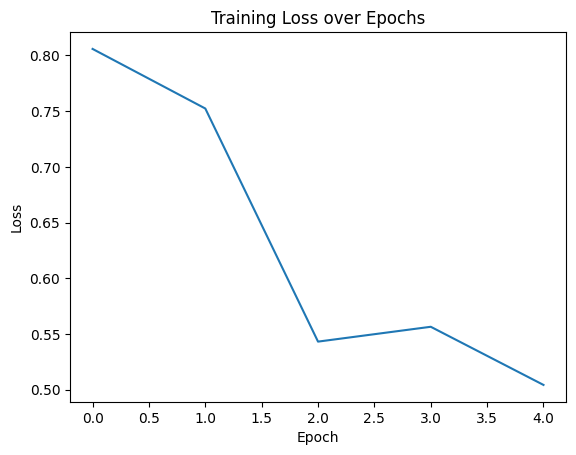

Val_accuracy,▁▃█▆█
epoch,▁▃▅▆█
train_accuracy,▁▃█▆█
train_loss,█▇▂▂▁
Val_accuracy,80.83333
epoch,4
train_accuracy,81.53958
train_loss,0.50431


wandb: Agent Starting Run: zyrnwv58 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: Nadam
wandb: 	weight: xavier
wandb: 	weight_decay: 0


Epoch 1, Loss: 0.835089246877713 , Accuracy: 64.75625000000001
Epoch 2, Loss: 0.5685985587941885 , Accuracy: 77.58958333333334
Epoch 3, Loss: 0.5068550946762015 , Accuracy: 81.32083333333333
Epoch 4, Loss: 0.48627438511064386 , Accuracy: 81.96666666666667
Epoch 5, Loss: 0.454860316213965 , Accuracy: 82.66666666666667
Epoch 6, Loss: 0.41270946427821037 , Accuracy: 84.82291666666667
Epoch 7, Loss: 0.37330430707332807 , Accuracy: 86.35000000000001
Epoch 8, Loss: 0.37304807864698447 , Accuracy: 86.175
Epoch 9, Loss: 0.3755320163848613 , Accuracy: 86.05833333333334
Epoch 10, Loss: 0.37594531752011107 , Accuracy: 85.42916666666667


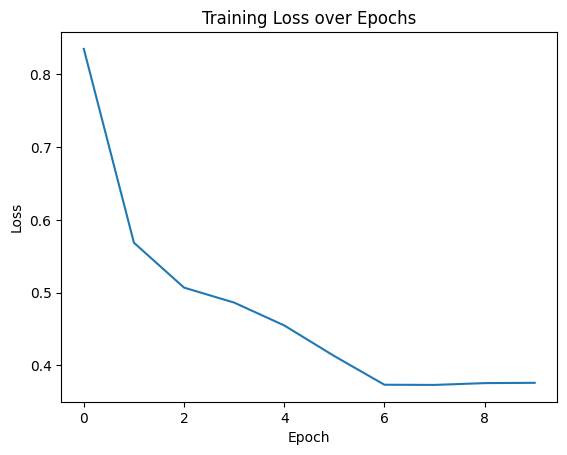

Val_accuracy,▁▅▆▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▇▇█████
train_loss,█▄▃▃▂▂▁▁▁▁
Val_accuracy,84.45
epoch,9
train_accuracy,85.42917
train_loss,0.37595


wandb: Agent Starting Run: bpfpyk9h with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer: 4
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: Nadam
wandb: 	weight: xavier
wandb: 	weight_decay: 0


Epoch 1, Loss: 0.8855102069952506 , Accuracy: 61.21458333333333
Epoch 2, Loss: 0.6321821270218965 , Accuracy: 76.39375000000001
Epoch 3, Loss: 0.6192070070173893 , Accuracy: 77.05416666666667
Epoch 4, Loss: 0.5564342034115921 , Accuracy: 79.51666666666667
Epoch 5, Loss: 0.48454566354235057 , Accuracy: 83.16875
Epoch 6, Loss: 0.41614779600000057 , Accuracy: 85.01458333333333
Epoch 7, Loss: 0.4223978792251703 , Accuracy: 85.21666666666667
Epoch 8, Loss: 0.4253820771685923 , Accuracy: 84.15208333333334
Epoch 9, Loss: 0.401860540770362 , Accuracy: 85.44791666666667
Epoch 10, Loss: 0.3984368471511936 , Accuracy: 85.25625


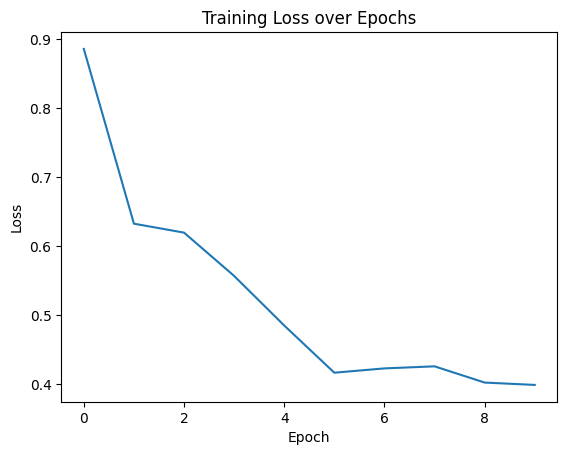

Val_accuracy,▁▅▆▆▇█████
epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▆▇█████
train_loss,█▄▄▃▂▁▁▁▁▁
Val_accuracy,84.425
epoch,9
train_accuracy,85.25625
train_loss,0.39844


wandb: Agent Starting Run: 0mwa5twi with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight: xavier
wandb: 	weight_decay: 0


Epoch 1, Loss: 0.7399356567347805 , Accuracy: 71.95625
Epoch 2, Loss: 0.6897463098813204 , Accuracy: 73.94375
Epoch 3, Loss: 0.5123592203551872 , Accuracy: 81.86250000000001
Epoch 4, Loss: 0.5049016483235006 , Accuracy: 81.76458333333333
Epoch 5, Loss: 0.4532028453808936 , Accuracy: 83.7
Epoch 6, Loss: 0.42394357541286337 , Accuracy: 84.57916666666667
Epoch 7, Loss: 0.4084402196589455 , Accuracy: 84.95416666666667
Epoch 8, Loss: 0.4219607558867531 , Accuracy: 84.14791666666666
Epoch 9, Loss: 0.37140000112355886 , Accuracy: 86.42708333333333
Epoch 10, Loss: 0.3656636114238392 , Accuracy: 86.5375


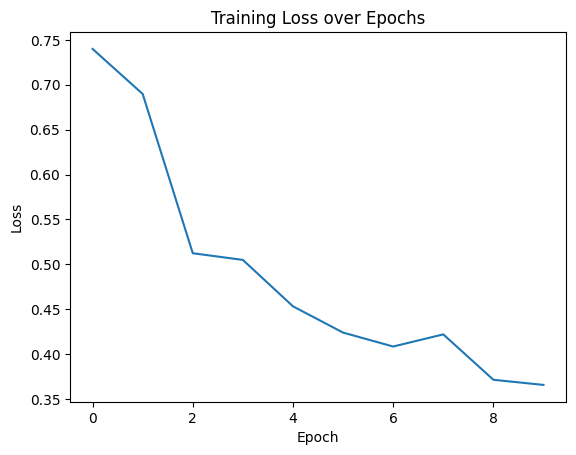

Val_accuracy,▁▂▆▆▇▇▇▇██
epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▂▆▆▇▇▇▇██
train_loss,█▇▄▄▃▂▂▂▁▁
Val_accuracy,85.10833
epoch,9
train_accuracy,86.5375
train_loss,0.36566


wandb: Agent Starting Run: vah2j9jg with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer: 3
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight: xavier
wandb: 	weight_decay: 0


Epoch 1, Loss: 1.0660032264420591 , Accuracy: 61.23125
Epoch 2, Loss: 0.6445934377565998 , Accuracy: 75.73541666666667
Epoch 3, Loss: 0.5859119710607874 , Accuracy: 78.8375
Epoch 4, Loss: 0.5226075217209041 , Accuracy: 80.69375
Epoch 5, Loss: 0.4893064996557267 , Accuracy: 82.44166666666666
Epoch 6, Loss: 0.44228085876917045 , Accuracy: 83.92500000000001
Epoch 7, Loss: 0.4438887501208666 , Accuracy: 83.75208333333333
Epoch 8, Loss: 0.4008419888549487 , Accuracy: 85.2375
Epoch 9, Loss: 0.37623841630214383 , Accuracy: 86.61458333333333
Epoch 10, Loss: 0.3945449583818059 , Accuracy: 85.40416666666667


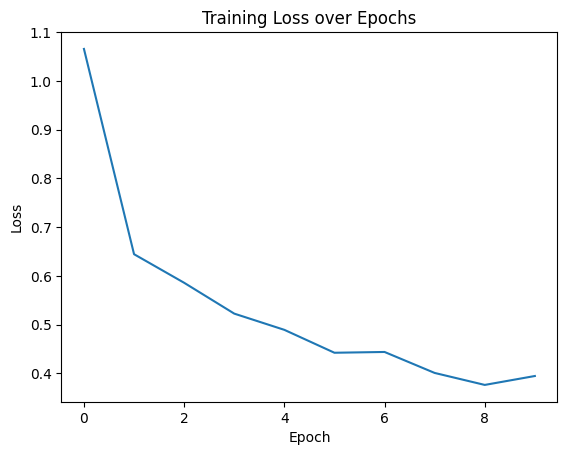

Val_accuracy,▁▅▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▆▇▇▇███
train_loss,█▄▃▂▂▂▂▁▁▁
Val_accuracy,83.95
epoch,9
train_accuracy,85.40417
train_loss,0.39454


wandb: Agent Starting Run: vqdm861o with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight: xavier
wandb: 	weight_decay: 0


Epoch 1, Loss: 0.6597039587082093 , Accuracy: 73.50833333333333
Epoch 2, Loss: 0.5506266008456971 , Accuracy: 80.16458333333333
Epoch 3, Loss: 0.48805902426004816 , Accuracy: 82.45416666666667
Epoch 4, Loss: 0.5087328726507825 , Accuracy: 81.08125000000001
Epoch 5, Loss: 0.4452959446329941 , Accuracy: 83.82916666666667
Epoch 6, Loss: 0.40209006714623136 , Accuracy: 85.69583333333334
Epoch 7, Loss: 0.40897811731496087 , Accuracy: 85.375
Epoch 8, Loss: 0.4035365200531494 , Accuracy: 85.53333333333333
Epoch 9, Loss: 0.38041625205587176 , Accuracy: 86.41875
Epoch 10, Loss: 0.38045632444711114 , Accuracy: 85.92708333333333


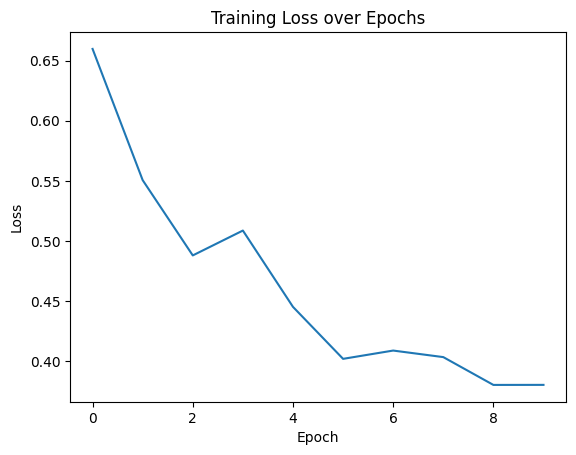

Val_accuracy,▁▅▆▅▆██▇██
epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▅▆▅▇█▇███
train_loss,█▅▄▄▃▂▂▂▁▁
Val_accuracy,85.05833
epoch,9
train_accuracy,85.92708
train_loss,0.38046


wandb: Agent Starting Run: zh7sf37w with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	hidden_layer: 3
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.0001
wandb: 	optimizer: adam
wandb: 	weight: xavier
wandb: 	weight_decay: 0


Epoch 1, Loss: 0.7635327396566338 , Accuracy: 70.50416666666666
Epoch 2, Loss: 0.6014457216774538 , Accuracy: 78.03750000000001
Epoch 3, Loss: 0.5046304831581433 , Accuracy: 82.05833333333334
Epoch 4, Loss: 0.46145841006703314 , Accuracy: 83.175
Epoch 5, Loss: 0.4227285583747762 , Accuracy: 85.00416666666666
Epoch 6, Loss: 0.4408553529093246 , Accuracy: 83.7
Epoch 7, Loss: 0.41065356447604995 , Accuracy: 85.45416666666667
Epoch 8, Loss: 0.3719841939147019 , Accuracy: 86.75208333333333
Epoch 9, Loss: 0.3913574428590794 , Accuracy: 85.85625
Epoch 10, Loss: 0.365522199759814 , Accuracy: 86.54583333333333


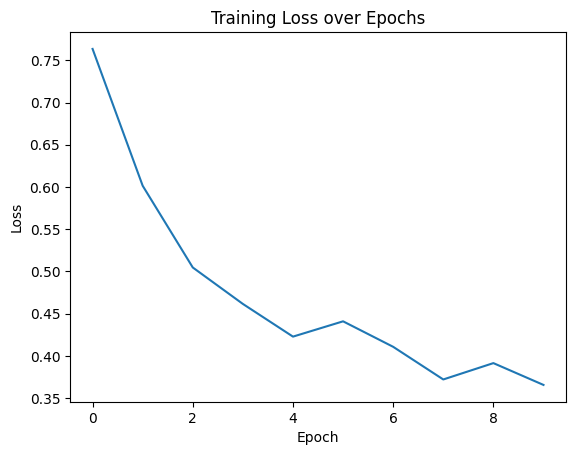

Val_accuracy,▁▄▆▇▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
train_accuracy,▁▄▆▆▇▇▇███
train_loss,█▅▃▃▂▂▂▁▁▁
Val_accuracy,85.13333
epoch,9
train_accuracy,86.54583
train_loss,0.36552


In [27]:
def main():
    '''
    WandB calls main function each time with differnet combination.

    We can retrive the same and use the same values for our hypermeters.

    '''



    with wandb.init() as run:
        run_name="ac-"+(wandb.config.activation)+"_hs-"+str(wandb.config.hidden_size)+"_epc-"+str(wandb.config.epochs)+"_hl-"+str(wandb.config.hidden_layer)+"_wd-"+str(wandb.config.weight_decay)+"_lr-"+str(wandb.config.learning_rate)+"_opt-"+str(wandb.config.optimizer)+"_bs-"+str(wandb.config.batch_size)+"_wi-"+str(wandb.config.weight)
        wandb.run.name=run_name


        model_train(wandb.config.learning_rate,  X_train, Y_train, X_valid, Y_valid, wandb.config.optimizer,wandb.config.weight_decay, wandb.config.epochs, wandb.config.activation, wandb.config.hidden_layer,
                    wandb.config.hidden_size,wandb.config.weight, 784, 10, wandb.config.batch_size,eps=0.01, beta=0.9, beta1=0.9, beta2=0.99)



wandb.agent(sweep_id, function=main,count=7) # calls main function for count number of times.
wandb.finish()

Optimozers for finding confusion matrix and predicting test accuracy on MNIST data set

In [23]:
def opt_RMSprop(lr, theta, x_train, y_train,X_valid, Y_valid,activ_fun, epochs, num_hidden_layer, input_size,batch_size, eps=0.01, beta=0.9):
    losses = []
    length = x_train.shape[0]
    v = {key: np.zeros_like(value) for key, value in theta.items()}
    prev_v = {key: np.zeros_like(value) for key, value in theta.items()}
    for epoch in range(epochs):
        no_of_pts = 0
        loss = 0
        grad_new = {key: np.zeros_like(value) for key, value in theta.items()}
        for j in range(length):
            no_of_pts += 1
            x = x_train[j, :].reshape(-1, 1)
            y_actual = y_train[j, :].reshape(-1, 1)
            grad = back_prop(x, y_actual,activ_fun, num_hidden_layer, theta, input_size)
            for i in range(num_hidden_layer+1, 0, -1):
                grad_new['W'+str(i)] += grad['W'+str(i)]
                grad_new['b'+str(i)] += grad['b'+str(i)]

            if no_of_pts % batch_size == 0:

              for i in range(1, num_hidden_layer + 2):
                  # Update velocity
                  v['W' + str(i)] = beta * prev_v['W' + str(i)] + (1-beta)* ((grad_new['W'+str(i)])**2)
                  v['b' + str(i)] = beta * prev_v['b' + str(i)] + (1-beta)* ((grad_new['b'+str(i)])**2)

              for i in range(1, num_hidden_layer + 2):
                  # Update parameters
                  theta['W' + str(i)] -= (lr/ (np.sqrt(v['W' + str(i)] + eps)) )*grad_new['W'+str(i)]
                  theta['b' + str(i)] -= (lr/ (np.sqrt(v['b' + str(i)] + eps)) )*grad_new['b'+str(i)]

              for i in range(1, num_hidden_layer + 2):
                  prev_v['W' + str(i)] = v['W' + str(i)]
                  prev_v['b' + str(i)] = v['b' + str(i)]


        acc = calculate_accuracy(x_train,y_train,theta,activ_fun, num_hidden_layer,input_size)
        a, _, y_pred = forword_prop(x_train.T,theta,activ_fun, num_hidden_layer,input_size)
        loss = cross_entropy(y_train.T, y_pred)
        losses.append(loss)
        validation_accuracy = calculate_accuracy(X_valid,Y_valid,theta,activ_fun, num_hidden_layer,input_size)
        print(f"Epoch {epoch+1}, Train_Loss: {loss} , Train_Accuracy: {acc*100},Test accutacy: {validation_accuracy*100}")

    # Plot the loss function over epochs
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return theta

def opt_Adam(lr, theta, x_train, y_train, X_valid, Y_valid, activ_fun, epochs, num_hidden_layer, input_size,batch_size,eps, beta1=0.9,beta2= 0.99):
    losses = []
    length = x_train.shape[0]
    v = {key: np.zeros_like(value) for key, value in theta.items()}
    prev_v = {key: np.zeros_like(value) for key, value in theta.items()}
    v_cap = {key: np.zeros_like(value) for key, value in theta.items()}

    m = {key: np.zeros_like(value) for key, value in theta.items()}
    prev_m = {key: np.zeros_like(value) for key, value in theta.items()}
    m_cap = {key: np.zeros_like(value) for key, value in theta.items()}

    for epoch in range(epochs):
        t = 0
        no_of_pts = 0
        loss = 0
        grad_new = {key: np.zeros_like(value) for key, value in theta.items()}
        for j in range(length):
            x = x_train[j, :].reshape(-1, 1)
            y_actual = y_train[j, :].reshape(-1, 1)
            grad = back_prop(x, y_actual,activ_fun, num_hidden_layer, theta, input_size)
            for i in range(num_hidden_layer+1, 0, -1):
                grad_new['W'+str(i)] += grad['W'+str(i)]
                grad_new['b'+str(i)] += grad['b'+str(i)]

            no_of_pts = no_of_pts + 1
            if no_of_pts % batch_size == 0:
              t = t + 1

              for i in range(1, num_hidden_layer + 2):
                  m['W' + str(i)] = beta1 * prev_m['W' + str(i)] + (1-beta1)* grad_new['W'+str(i)]
                  m['b' + str(i)] = beta1 * prev_m['b' + str(i)] + (1-beta1)* grad_new['b'+str(i)]

              for i in range(1, num_hidden_layer + 2):
                  m_cap['W' + str(i)] = (1/(1-np.power(beta1,t))) * m['W' + str(i)]
                  m_cap['b' + str(i)] = (1/(1-np.power(beta1,t))) * m['b' + str(i)]
                  prev_m['W' + str(i)] = m['W' + str(i)]
                  prev_m['b' + str(i)] = m['b' + str(i)]

              for i in range(1, num_hidden_layer + 2):
                  v['W' + str(i)] = beta2 * prev_v['W' + str(i)] + (1-beta2)* ((grad_new['W'+str(i)])**2)
                  v['b' + str(i)] = beta2 * prev_v['b' + str(i)] + (1-beta2)* ((grad_new['b'+str(i)])**2)

              for i in range(1, num_hidden_layer + 2):
                  v_cap['W' + str(i)] = (1/(1-np.power(beta2,t))) * v['W' + str(i)]
                  v_cap['b' + str(i)] = (1/(1-np.power(beta2,t))) * v['b' + str(i)]
                  prev_v['W' + str(i)] = v['W' + str(i)]
                  prev_v['b' + str(i)] = v['b' + str(i)]


              for i in range(1, num_hidden_layer + 2):
                  # Update parameters
                  theta['W' + str(i)] -= (lr/ (np.sqrt(v_cap['W' + str(i)] + eps)) )*(m_cap['W'+str(i)])
                  theta['b' + str(i)] -= (lr/ (np.sqrt(v_cap['b' + str(i)] + eps)) )*(m_cap['b'+str(i)])


        acc = calculate_accuracy(x_train,y_train,theta,activ_fun, num_hidden_layer,input_size)
        a, _, y_pred = forword_prop(x_train.T,theta,activ_fun, num_hidden_layer,input_size)
        loss = cross_entropy(y_train.T, y_pred)
        losses.append(loss)
        validation_accuracy = calculate_accuracy(X_valid,Y_valid,theta,activ_fun, num_hidden_layer,input_size)
        print(f"Epoch {epoch+1}, Train_Loss: {loss} , Train_Accuracy: {acc*100},Test accutacy: {validation_accuracy*100}")
    # Plot the loss function over epochs
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return theta

def opt_Nadam(lr, theta, x_train, y_train,X_valid, Y_valid,activ_fun, epochs, num_hidden_layer, input_size, batch_size,eps, beta1=0.9,beta2=0.99):
    losses = []
    length = x_train.shape[0]
    v = {key: np.zeros_like(value) for key, value in theta.items()}
    prev_v = {key: np.zeros_like(value) for key, value in theta.items()}
    v_cap = {key: np.zeros_like(value) for key, value in theta.items()}

    m = {key: np.zeros_like(value) for key, value in theta.items()}
    prev_m = {key: np.zeros_like(value) for key, value in theta.items()}
    m_cap = {key: np.zeros_like(value) for key, value in theta.items()}

    for epoch in range(epochs):
        t = 0
        no_of_pts = 0
        loss = 0
        grad_new = {key: np.zeros_like(value) for key, value in theta.items()}
        for j in range(length):
            x = x_train[j, :].reshape(-1, 1)
            y_actual = y_train[j, :].reshape(-1, 1)
            grad = back_prop(x, y_actual,activ_fun, num_hidden_layer, theta, input_size)
            for i in range(num_hidden_layer+1, 0, -1):
                grad_new['W'+str(i)] += grad['W'+str(i)]
                grad_new['b'+str(i)] += grad['b'+str(i)]

            no_of_pts += 1
            if no_of_pts % batch_size == 0:
              t = t + 1

              for i in range(1, num_hidden_layer + 2):
                  m['W' + str(i)] = beta1 * prev_m['W' + str(i)] + (1-beta1)* grad_new['W'+str(i)]
                  m['b' + str(i)] = beta1 * prev_m['b' + str(i)] + (1-beta1)* grad_new['b'+str(i)]

              for i in range(1, num_hidden_layer + 2):
                  m_cap['W' + str(i)] = (1/(1-np.power(beta1,t))) * m['W' + str(i)]
                  m_cap['b' + str(i)] = (1/(1-np.power(beta1,t))) * m['b' + str(i)]
                  prev_m['W' + str(i)] = m['W' + str(i)]
                  prev_m['b' + str(i)] = m['b' + str(i)]

              for i in range(1, num_hidden_layer + 2):
                  v['W' + str(i)] = beta2 * prev_v['W' + str(i)] + (1-beta2)* ((grad_new['W'+str(i)])**2)
                  v['b' + str(i)] = beta2 * prev_v['b' + str(i)] + (1-beta2)* ((grad_new['b'+str(i)])**2)

              for i in range(1, num_hidden_layer + 2):
                  v_cap['W' + str(i)] = (1/(1-np.power(beta2,t))) * v['W' + str(i)]
                  v_cap['b' + str(i)] = (1/(1-np.power(beta2,t))) * v['b' + str(i)]
                  prev_v['W' + str(i)] = v['W' + str(i)]
                  prev_v['b' + str(i)] = v['b' + str(i)]


              for i in range(1, num_hidden_layer + 2):
                  # Update parameters
                  theta['W' + str(i)] -= (lr/ (np.sqrt(v_cap['W' + str(i)] + eps)) )*(beta1*(m_cap['W'+str(i)])+((1-beta1)*(grad_new['W'+str(i)]))/(1-np.power(beta1,t)))
                  theta['b' + str(i)] -= (lr/ (np.sqrt(v_cap['b' + str(i)] + eps)) )*(beta1*(m_cap['b'+str(i)])+((1-beta1)*(grad_new['b'+str(i)]))/(1-np.power(beta1,t)))

        acc = calculate_accuracy(x_train,y_train,theta,activ_fun, num_hidden_layer,input_size)
        a, _, y_pred = forword_prop(x_train.T,theta,activ_fun, num_hidden_layer,input_size)
        loss = cross_entropy(y_train.T, y_pred)
        losses.append(loss)
        test_accuracy = calculate_accuracy(X_valid,Y_valid,theta,activ_fun, num_hidden_layer,input_size)

        print(f"Epoch {epoch+1}, Train_Loss: {loss} , Train_Accuracy: {acc*100},Test accutacy: {test_accuracy*100}")

    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.show()

    return theta


Question-7

Ideal hyperparameters for Neural Network model

In [28]:
ideal_epochs = 10
ideal_weight = 'xavier'
ideal_activ_func = 'relu'
ideal_hidden_size = 128
ideal_batch_size = 64
ideal_optimizer = 'RMSprop'
ideal_hidden_layer = 5
ideal_weight_decay = 0
ideal_learning_rate = 0.0001




Epoch 1, Train_Loss: 0.4354403465642966 , Train_Accuracy: 84.75833333333334,Test accutacy: 83.41
Epoch 2, Train_Loss: 0.3673515155849908 , Train_Accuracy: 86.49791666666667,Test accutacy: 84.92
Epoch 3, Train_Loss: 0.35373460653841654 , Train_Accuracy: 86.94166666666666,Test accutacy: 85.27
Epoch 4, Train_Loss: 0.3218450315680517 , Train_Accuracy: 88.225,Test accutacy: 85.5
Epoch 5, Train_Loss: 0.3121024772922906 , Train_Accuracy: 88.55208333333333,Test accutacy: 85.92
Epoch 6, Train_Loss: 0.31300525882792696 , Train_Accuracy: 88.61458333333333,Test accutacy: 85.97
Epoch 7, Train_Loss: 0.3190981849010609 , Train_Accuracy: 88.2375,Test accutacy: 85.72999999999999
Epoch 8, Train_Loss: 0.3065201956746658 , Train_Accuracy: 88.9875,Test accutacy: 86.09
Epoch 9, Train_Loss: 0.3019537351290705 , Train_Accuracy: 89.21666666666667,Test accutacy: 86.63
Epoch 10, Train_Loss: 0.29943219588903086 , Train_Accuracy: 89.0,Test accutacy: 86.39


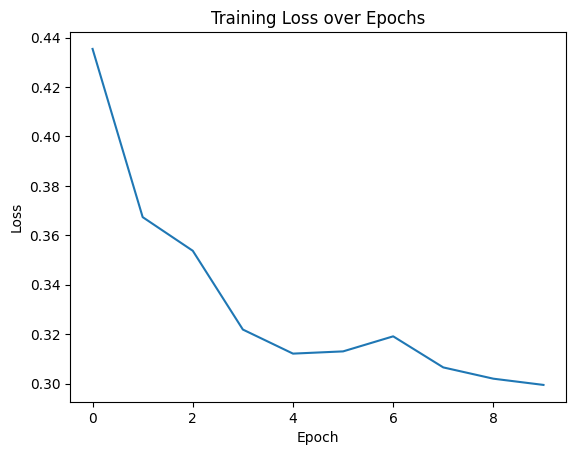

In [29]:
W_b1 = init_network( num_hidden_layer=5, num_nodes_hidden_layers=128, weight='xavier',input_size=784 , output_size=10 )
W_b_rms= opt_RMSprop(0.0001, W_b1, X_train, Y_train, X_test, Y_test,activ_fun='relu', epochs=10, num_hidden_layer=5, input_size=784 ,batch_size=64, eps=0.01, beta=0.9)


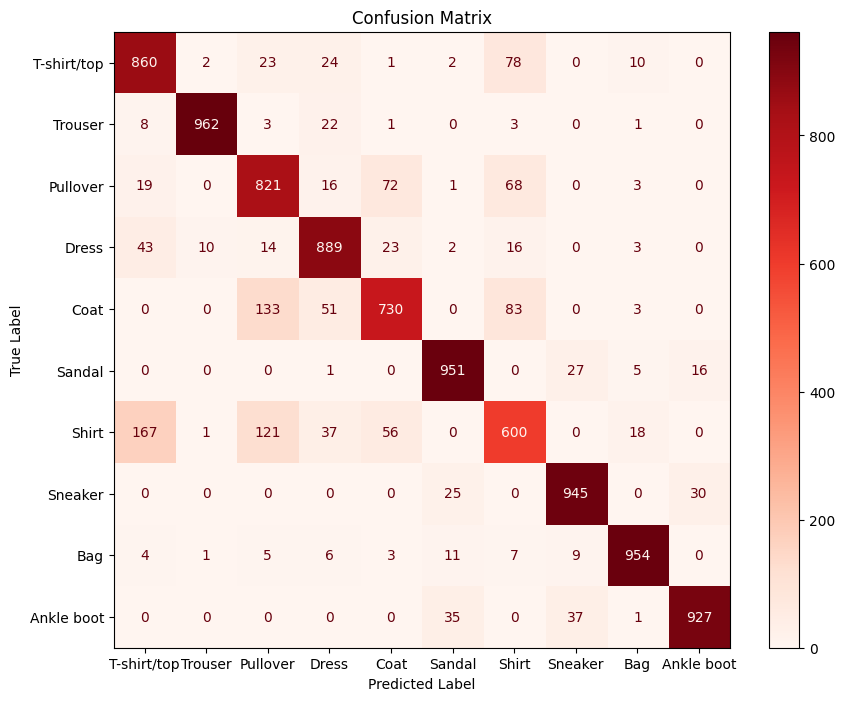

In [35]:
y_test_label = []
y_test_pred_label = []
l = X_test.shape[0]
for i in range(l):
  X_tes = X_test[i,:].reshape(-1, 1)
  a,h,y_test_pred = forword_prop(X_tes,W_b_rms, activ_fun='relu', num_hidden_layer=5,input_size=784)
  y1 = np.argmax(Y_test[i,:].reshape(-1, 1), axis = 0)
  y_test_label.append(y1)
  y2 = np.argmax(y_test_pred, axis = 0)
  y_test_pred_label.append(y2)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_label[:10000], y_test_pred_label[:10000])

class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress","Coat","Sandal","Shirt", "Sneaker", "Bag","Ankle boot"]

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
cm_display.plot(ax=ax, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Question-10

In [36]:
from keras.datasets import mnist
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Flatten the image data
X_train = Xtrain.reshape(Xtrain.shape[0], -1)
X_test = Xtest.reshape(Xtest.shape[0], -1)

# Normalize the image data
MX_train = X_train / 255.0
MX_test = X_test / 255.0

def one_hot_encod(arr):
  mat = np.zeros((len(arr),10))
  for i in range(len(arr)):
    mat[i,arr[i]] = 1
  return mat
# Convert labels to one-hot encoding
MY_train =  one_hot_encod(ytrain)
MY_test =  one_hot_encod(ytest)
print("Training images shape:", MX_train.shape)
print("Training labels shape:", MY_train.shape)
print("Testing images shape:", MX_test.shape)
print("Testing labels shape:", MY_test.shape)


Training images shape: (60000, 784)
Training labels shape: (60000, 10)
Testing images shape: (10000, 784)
Testing labels shape: (10000, 10)


Epoch 1, Train_Loss: 0.19126528975616267 , Train_Accuracy: 94.36833333333333,Test accutacy: 93.94
Epoch 2, Train_Loss: 0.13320472120806115 , Train_Accuracy: 95.95666666666666,Test accutacy: 95.42
Epoch 3, Train_Loss: 0.1181956397053852 , Train_Accuracy: 96.485,Test accutacy: 95.61
Epoch 4, Train_Loss: 0.10071412550091505 , Train_Accuracy: 96.99833333333333,Test accutacy: 96.26
Epoch 5, Train_Loss: 0.10695126035182483 , Train_Accuracy: 96.82166666666666,Test accutacy: 96.04
Epoch 6, Train_Loss: 0.08601618548002404 , Train_Accuracy: 97.52333333333333,Test accutacy: 96.72
Epoch 7, Train_Loss: 0.08932753549225876 , Train_Accuracy: 97.39166666666667,Test accutacy: 96.14
Epoch 8, Train_Loss: 0.08572184231219941 , Train_Accuracy: 97.585,Test accutacy: 96.39
Epoch 9, Train_Loss: 0.08522840034022541 , Train_Accuracy: 97.56,Test accutacy: 96.52
Epoch 10, Train_Loss: 0.0921404587970093 , Train_Accuracy: 97.69833333333334,Test accutacy: 96.17


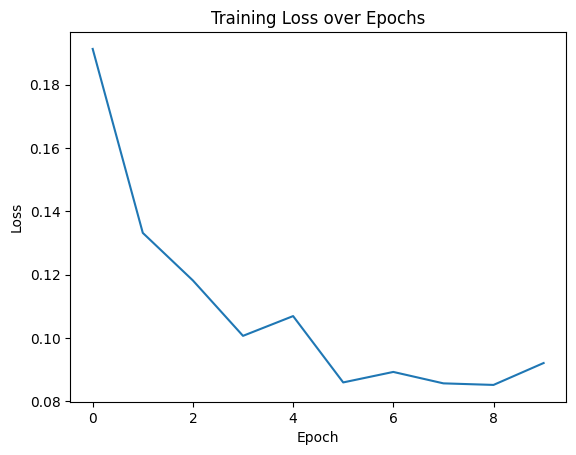

Epoch 1, Train_Loss: 0.42734141605790105 , Train_Accuracy: 87.54333333333332,Test accutacy: 87.46000000000001
Epoch 2, Train_Loss: 0.21527260127855388 , Train_Accuracy: 93.66666666666667,Test accutacy: 93.56
Epoch 3, Train_Loss: 0.1576633449975645 , Train_Accuracy: 95.33333333333334,Test accutacy: 94.82000000000001
Epoch 4, Train_Loss: 0.14056215497814115 , Train_Accuracy: 95.92166666666667,Test accutacy: 95.3
Epoch 5, Train_Loss: 0.11816230470067837 , Train_Accuracy: 96.61166666666666,Test accutacy: 95.64
Epoch 6, Train_Loss: 0.10104782218882714 , Train_Accuracy: 97.03333333333333,Test accutacy: 95.96000000000001
Epoch 7, Train_Loss: 0.09332385818603273 , Train_Accuracy: 97.13000000000001,Test accutacy: 96.14
Epoch 8, Train_Loss: 0.08269469398402911 , Train_Accuracy: 97.36666666666667,Test accutacy: 96.27
Epoch 9, Train_Loss: 0.06650275027466399 , Train_Accuracy: 97.91833333333332,Test accutacy: 96.52
Epoch 10, Train_Loss: 0.06059511366151509 , Train_Accuracy: 98.20333333333333,Test a

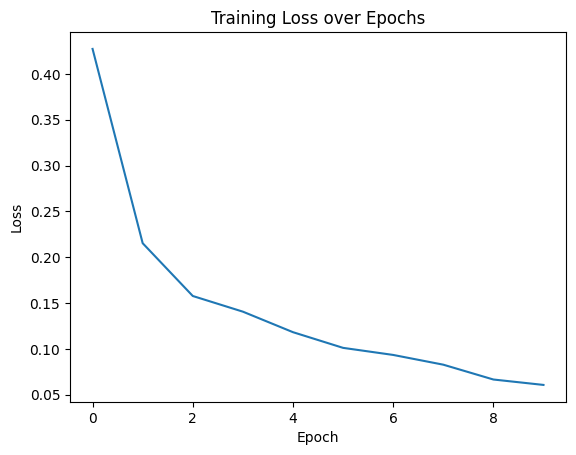

Epoch 1, Train_Loss: 0.2792105460269758 , Train_Accuracy: 92.04,Test accutacy: 91.99000000000001
Epoch 2, Train_Loss: 0.18398731323043854 , Train_Accuracy: 94.61,Test accutacy: 93.88
Epoch 3, Train_Loss: 0.15576184236775306 , Train_Accuracy: 95.35166666666667,Test accutacy: 94.71000000000001
Epoch 4, Train_Loss: 0.12625121381744908 , Train_Accuracy: 96.19333333333333,Test accutacy: 95.42
Epoch 5, Train_Loss: 0.12031648782173814 , Train_Accuracy: 96.355,Test accutacy: 95.52000000000001
Epoch 6, Train_Loss: 0.11773124299317385 , Train_Accuracy: 96.525,Test accutacy: 95.6
Epoch 7, Train_Loss: 0.11107677125164958 , Train_Accuracy: 96.62333333333333,Test accutacy: 95.41
Epoch 8, Train_Loss: 0.11212992305748376 , Train_Accuracy: 96.71166666666666,Test accutacy: 95.56
Epoch 9, Train_Loss: 0.10062104461788521 , Train_Accuracy: 97.015,Test accutacy: 95.64
Epoch 10, Train_Loss: 0.09379531568787171 , Train_Accuracy: 97.23166666666667,Test accutacy: 95.89999999999999


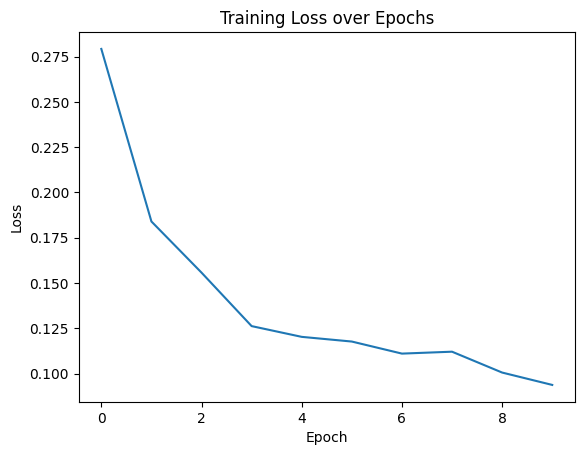

In [38]:
#---------------------------------------------------
#lr = 0.0001 , num_hidden_layer = 5 , num_nodes_hidden_layers= 128, weight = xavior, activ_fun = 'relu' , epoch = 10 , batch_size = 64
#----------------------------------------------------
W_b1 = init_network( num_hidden_layer=5, num_nodes_hidden_layers=128, weight='xavier',input_size=784 , output_size=10 )
Wb1 =opt_RMSprop(0.0001, W_b1, MX_train, MY_train,MX_test, MY_test,activ_fun='relu', epochs=10, num_hidden_layer=5, input_size=784 ,batch_size=64, eps=0.01, beta=0.9)

#---------------------------------------------------
# lr = 0.0001 , num_hidden_layer = 3 , num_nodes_hidden_layers= 128, weight = xavior, activ_fun = 'sigmoid' , epoch = 10 , batch_size = 32
#----------------------------------------------------
W_b2 = init_network( num_hidden_layer=3, num_nodes_hidden_layers=128, weight='xavier',input_size=784 , output_size=10 )
Wb2 = opt_Adam(0.0001,  W_b2, MX_train, MY_train,MX_test, MY_test, activ_fun='sigmoid', epochs=10, num_hidden_layer=3, input_size=784,batch_size=32 ,eps=0.01, beta1=0.9,beta2= 0.99)


#---------------------------------------------------
# lr = 0.0001 , num_hidden_layer = 3 , num_nodes_hidden_layers= 64, weight = xavior, activ_fun = 'relu' , epoch = 10 , batch_size = 32
#----------------------------------------------------
W_b3 = init_network(num_hidden_layer=3, num_nodes_hidden_layers=64, weight='xavier',input_size=784 , output_size=10)
Wb3 = opt_Nadam(0.0001, W_b3, MX_train, MY_train,MX_test, MY_test,activ_fun='relu', epochs=10, num_hidden_layer=3, input_size=784,batch_size=32,eps=0.01, beta1=0.9,beta2=0.99)
